# Commercial Bank Customer Retention Prediction

## APSTA-GE.2401: Statistical Consulting

## Scripts

Created on: 12/07/2020

Modified on: 12/07/2020

## Exploratory Data Analysis (EDA)

----

### Description

This script contains the EDA section of data analysis. 

Data path: `../data/preprocess/`

### Data

The data we imported are: 

- `X_train.csv`: contains all features in Q3 and Q4 of 2019 for training. Imported as `X`.
- `y_train.csv`: contains the label variable for validation. Imported as `y`.
- `X_test.csv`: contains all features in Q1 of 2020 for testing. Imported as `X_true`.

After importing the data, we confirmed that both train sets have the same number of records: **145296**. We also confirmed that the testing set has **76722** records.

### Research Design

The strategy of supervised learning is to train models using the `X_train` data and validate model performance using the `y_train` data. After training, we fit the model to the `X_test` data. The model will then generate predictions, `y_test`, based on `X_test`. 

To increase model performance, we splited the train set into two sets: 80% of the train data goes to the `X_train` set and 20% of the data goes to the `X_test` set. Then, we conducted a 5-fold cross validation and selected the best performed model output. We also find tuned hyperparameters using randomized search.

### Details on EDA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('SUCCESS! All modules are imported.')

SUCCESS! All modules are imported.


In [2]:
X = pd.read_csv('../data/preprocess/X_train.csv')
y = pd.read_csv('../data/preprocess/y_train.csv')
X_true = pd.read_csv('../data/preprocess/X_test.csv')

In [3]:
print('The proprocessed training set has {} rows and {} columns.'.format(X.shape[0], X.shape[1]))
print('The proprocessed validation set has {} rows and {} columns.'.format(y.shape[0], y.shape[1]))
print('The proprocessed testing set has {} rows and {} columns.'.format(X_true.shape[0], X_true.shape[1]))

The proprocessed training set has 145296 rows and 56 columns.
The proprocessed validation set has 145296 rows and 2 columns.
The proprocessed testing set has 76722 rows and 56 columns.


----

## Features

We first inspected the feature set. 

1. There are 55 features in the feature set. 
2. We checked the correlation among features and the label. 
3. We checked if there are any missing values in the set. We found multiple columns that contain missing values, ranging from 0.005% to 100%. For columnsfeat containing a large portion of missing values, we dropped the column to reduce computational burden. For columns containing a small portion of missing values, we applied a deep learning library, [Datawig](https://github.com/awslabs/datawig), which learns machine learning models using deep neural networks to impute missing values in the data.
    - After dropping columns containing large portion of missing values, we reduced number of features to 45.
    - After imputing missing values using deep learning

### Dimensions

In [4]:
X.head().transpose()

,0,1,2,3,4
cust_no,0xb2d640a6,0xb2d4dd44,0xb2d69fef,0xb2d42c89,0xb2d90b58
X1,51000,0,20000,0,0
X2,0,0,0,0,0
X3,256.54,208.51,3265.03,1.41,13.38
X4,0,0,0,0,0
X5,0,0,0,333.01,0
X6,0,0,0,0,0
X7,0,0,0,0,0
X8,0,0,200000,0,0
B1,1,0,0,23,0


In [5]:
print('There are {} columns in the feature set.'.format(X.shape[1]))
X.columns

There are 56 columns in the feature set.


Index(['cust_no', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17',
       'E18', 'C1', 'C2', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9',
       'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19',
       'I20'],
      dtype='object')

### Correlation

In [6]:
Xfull = X.merge(y, how='left', on='cust_no')
corrMatrix = Xfull.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

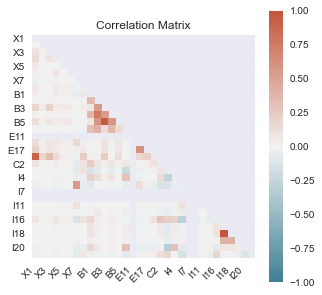

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(
    corrMatrix,
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)
ax.set_title('Correlation Matrix')
fig.savefig('../results/correlation_matrix.png', dpi=100)

In [2]:
# Check missing values
missing_val = X.isnull().sum()
for index in missing_val.index:
    if missing_val[index] > 0:
        print('{} has {} missing values. ({:.4%})'.format(index, missing_val[index], missing_val[index]/len(X)))

NameError: name 'X' is not defined

In [9]:
X_original = X.copy()

In [10]:
# Drop columns with large portion of missing values
col_to_drop = ['E7', 'E8', 'E9', 'E11', 'E12', 'E13', 'I9', 'I10', 'I13', 'I14']
X = X.drop(col_to_drop, axis=1)

In [11]:
print('After dropping columns containing large portion of missing values, now the set has {} columns.'.format(X.shape[1]))

After dropping columns containing large portion of missing values, now the set has 46 columns.


In [12]:
# Check missing values
missing_val = X.isnull().sum()
for index in missing_val.index:
    if missing_val[index] > 0:
        print('{} has {} missing values. ({:.4%})'.format(index, missing_val[index], missing_val[index]/len(X)))

B6 has 8878 missing values. (6.1103%)
E2 has 6370 missing values. (4.3842%)
E3 has 6370 missing values. (4.3842%)
E4 has 84483 missing values. (58.1454%)
E5 has 55129 missing values. (37.9425%)
E6 has 7538 missing values. (5.1880%)
E10 has 816 missing values. (0.5616%)
E14 has 90010 missing values. (61.9494%)
E16 has 68530 missing values. (47.1658%)
E18 has 62147 missing values. (42.7727%)
C1 has 7 missing values. (0.0048%)
C2 has 7 missing values. (0.0048%)
I1 has 64 missing values. (0.0440%)
I5 has 11604 missing values. (7.9865%)


In [13]:
# Impute small portion missing values
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,145296.0,210015.292919,2.085014e+06,0.0,0.00,0.00,120000.0000,1.918000e+08
X2,145296.0,15644.743001,1.204459e+06,0.0,0.00,0.00,0.0000,3.320671e+08
X3,145296.0,38458.916334,6.380324e+05,0.0,50.69,1000.67,7340.8325,1.420225e+08
X4,145296.0,29288.439462,3.170115e+05,0.0,0.00,0.00,0.0000,5.086000e+07
X5,145296.0,1680.380756,4.411058e+04,0.0,0.00,0.00,0.0000,7.000000e+06
X6,145296.0,3069.589996,1.023493e+05,0.0,0.00,0.00,0.0000,1.154171e+07
X7,145296.0,317922.055208,1.536874e+06,0.0,0.00,0.00,0.0000,3.283146e+07
X8,145296.0,78000.268418,4.264295e+05,0.0,0.00,0.00,0.0000,5.000000e+07
B1,145296.0,4.980743,1.251330e+01,0.0,0.00,0.00,4.0000,7.530000e+02
B2,145296.0,1.466702,8.612308e+00,0.0,0.00,0.00,1.0000,1.152000e+03


In [14]:
# Dates
X['B6'] = X['B6'].fillna(0)
X['E2'] = X['E2'].fillna(0)
X['E3'] = X['E3'].fillna(0)
X['E4'] = X['E4'].fillna(0)
X['E5'] = X['E5'].fillna(0)
X['E6'] = X['E6'].fillna(0)
X['E10'] = X['E10'].fillna(0)
X['E14'] = X['E14'].fillna(0)
X['E16'] = X['E16'].fillna(0)
X['E18'] = X['E18'].fillna(0)

# Numeric
X['C1'] = X['C1'].fillna(0)
X['C2'] = X['C2'].replace(np.NaN, int(X['C2'].mean()))

# Categorical
X['I1'] = X['I1'].fillna(0)
X['I5'] = X['I5'].replace(np.NaN, '不便分类的其他从业人员')

In [15]:
# Check missing values
missing_val = X.isnull().sum()
for index in missing_val.index:
    if missing_val[index] > 0:
        print('{} has {} missing values. ({:.4%})'.format(index, missing_val[index], missing_val[index]/len(X)))

### Feature EDA

In [53]:
X['X1'].max()

191800000.0

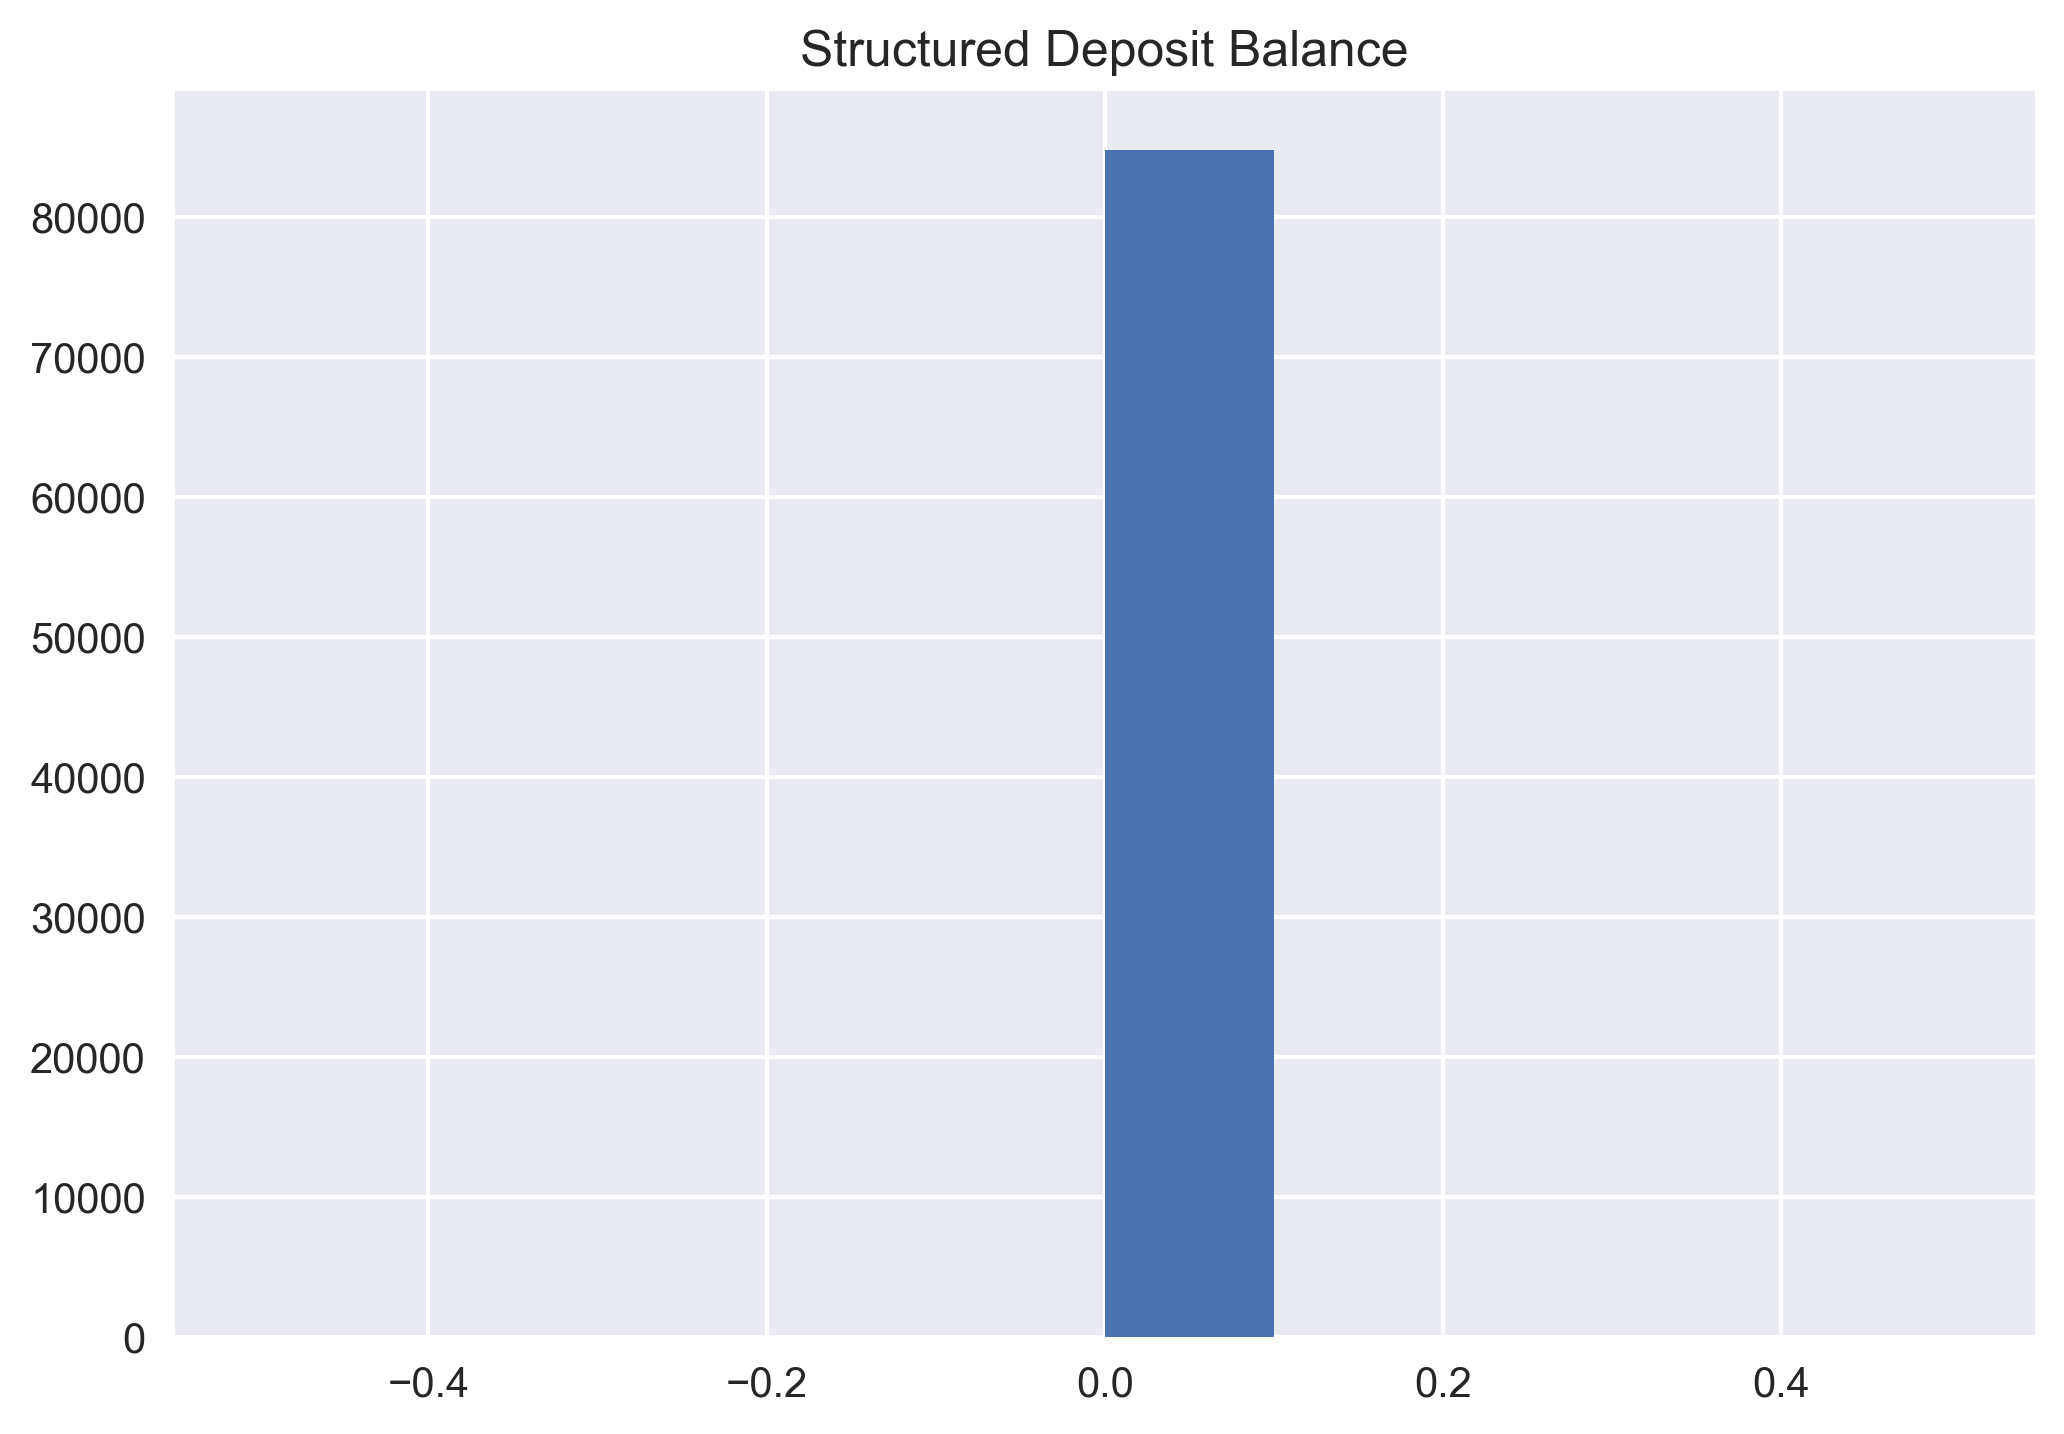

In [58]:
# plt.style.use('seaborn')
fig = plt.figure(num=None, dpi=300)
plt.hist()
plt.xlabel('')
plt.ylabel('')
plt.title('Structured Deposit Balance')
plt.show()
fig.savefig('../results/structured_deposit_balance.png', dpi=fig.dpi)

### Dummy Coding

In [64]:
enc = OneHotEncoder()
enc.fit(X.iloc[:, 1:3])

<bound method OneHotEncoder.get_feature_names of OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)>

### SVD

In [62]:
scaler = StandardScaler()
scaler.fit(X.drop('cust_no', axis=1))
scaled_X = pd.DataFrame(scaler.transform(X.drop('cust_no', axis=1)), columns=X.columns[1: ])

ValueError: could not convert string to float: '2019-09-12 04:09:00'

In [ ]:
U, sig, Vt = np.linalg.svd(scaled_X)
fig = figure(figsize=(10, 10))
plt.plot(np.cumsum(sig**2) / np.sum(sig**2))
fig.savefig('../results/correlation_matrix.png', dpi=300)